In this notebook I evaluate the quality of binary representation of CIFAR10, which were obtain by different methods.

In [7]:
# ! pip install numpy
# ! pip install h5py
# ! pip install pandas
# ! pip install sklearn
# ! pip install seaborn

In [1]:
import numpy as np
import h5py
import pickle
import pandas as pd
# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement  

In [2]:
# mapping index and label in CIFAR10
idx_label = {0: 'airplane',
             1: 'automobile',
             2: 'bird',
             3: 'cat',
             4: 'deer',
             5: 'dog',
             6: 'frog',
             7: 'horse',
             8: 'ship',
             9: 'truck'}

### Binary

In [3]:
# test
# 32 bit

# deepbit
bin_deepbit = h5py.File('./data/original/bin/DeepBit/analysis_32/binary-test.mat','r')
bin_deepbit = np.array(bin_deepbit.get('binary_test'))
label_deepbit = []
with open('./data/original/bin/DeepBit/test-label.txt') as f:
    for line in f:
        label_deepbit.append(int(line.strip()))

# greedyhash
bin_greedy = np.load('./data/original/bin/GreedyHash/GreedyHash_QueryB_bit32.npy')
label_greedy = np.load('./data/original/bin/GreedyHash/GreedyHash_QueryL_bit32.npy')
label_greedy = np.nonzero(label_greedy)[1]

# bihalf
bin_bihalf = np.load('./data/original/bin/BiHalf/QueryB_bit32.npy')
label_bihalf = np.load('./data/original/bin/BiHalf/QueryL_bit32.npy')
label_bihalf = np.nonzero(label_bihalf)[1]

In [4]:
def kmeans_combine(dataframe, num_cluster, num_bit):
    """
    compute the purity of clusters
    clusters are formed by combine every two classes together
    """
    
    new_dataframe = dataframe.loc[:, ['label', 'bin_' + str(num_bit)]]
    
    kmeans = KMeans(init='k-means++', n_clusters=num_cluster, n_init=10)
    kmeans.fit(np.array(list(new_dataframe['bin_' + str(num_bit)].values)))
    new_dataframe['pred_class'] = kmeans.predict(np.array(list(new_dataframe['bin_' + str(num_bit)].values)))
    
    two_classes = list(combinations_with_replacement(sorted(new_dataframe['label'].unique()), 2))
    purity_mat = np.zeros([num_cluster, num_cluster])
    for combination in two_classes:
#         print(new_dataframe[new_dataframe['label'].isin(combination)])
        count = Counter(new_dataframe[new_dataframe['label'].isin(combination)]['pred_class'])
#         print(count)
        purity_mat[combination] = count.most_common(1)[0][1] / sum(count.values())
        purity_mat[combination[1], combination[0]] = purity_mat[combination]
        
    return purity_mat

In [5]:
# deepbit

df_deepbit = pd.DataFrame()
df_deepbit['label'] = label_deepbit
df_deepbit['bin_32'] = list(bin_deepbit)

(0, 10)

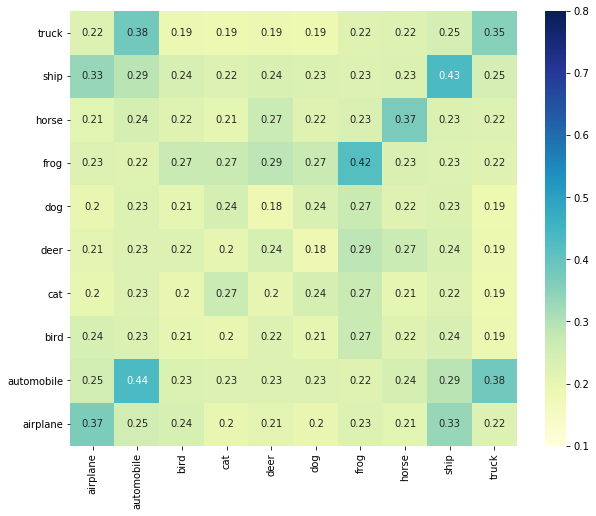

In [6]:
purity_matrices = np.array([kmeans_combine(df_deepbit, 10, 32) for i in range(10)])
purity_matrices = np.mean(purity_matrices, axis=0)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(purity_matrices,
                    cmap="YlGnBu",
                    annot=True,
                    vmin=0.1, vmax=0.8,
                    xticklabels=idx_label.values(),
                    yticklabels=idx_label.values())
ax.set_ylim(0, 10)

In [7]:
# greedyhash

df_greedy = pd.DataFrame()
df_greedy['label'] = label_greedy
df_greedy['bin_32'] = list(bin_greedy)

(0, 10)

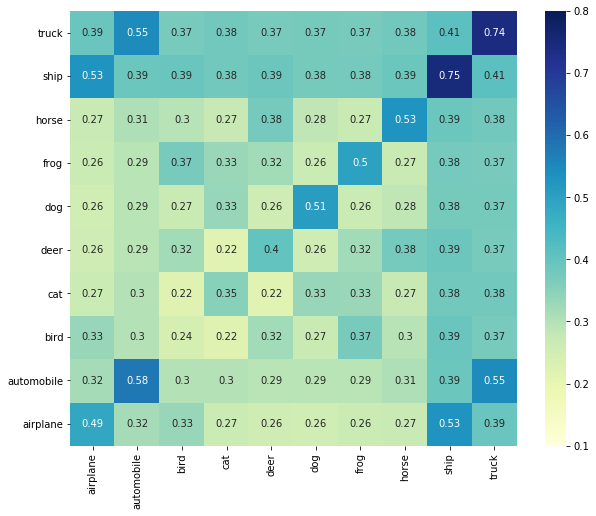

In [8]:
purity_matrices = np.array([kmeans_combine(df_greedy, 10, 32) for i in range(10)])
purity_matrices = np.mean(purity_matrices, axis=0)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(purity_matrices,
                    cmap="YlGnBu",
                    annot=True,
                    vmin=0.1, vmax=0.8,
                    xticklabels=idx_label.values(),
                    yticklabels=idx_label.values())
ax.set_ylim(0, 10)

In [9]:
# bihalf

df_bihalf = pd.DataFrame()
df_bihalf['label'] = label_bihalf
df_bihalf['bin_32'] = list(bin_bihalf)

(0, 10)

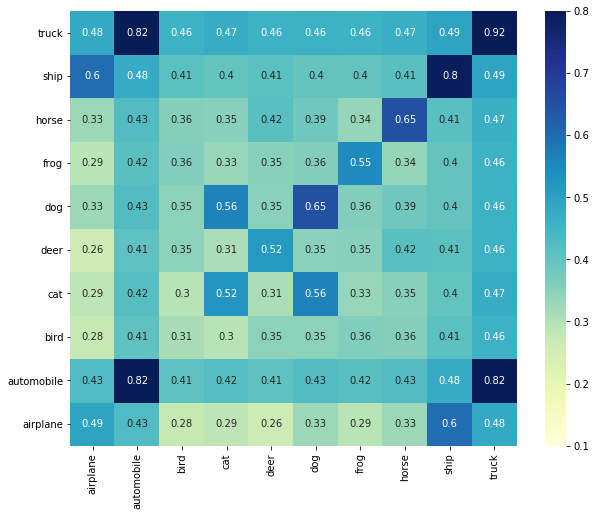

In [10]:
purity_matrices = np.array([kmeans_combine(df_bihalf, 10, 32) for i in range(10)])
purity_matrices = np.mean(purity_matrices, axis=0)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(purity_matrices,
                    cmap="YlGnBu",
                    annot=True,
                    vmin=0.1, vmax=0.8,
                    xticklabels=idx_label.values(),
                    yticklabels=idx_label.values())
ax.set_ylim(0, 10)

In [20]:
def count_bit(dataframe, num_bit):
    label_list = sorted(dataframe['label'].unique())
    sum_bit = []
    for l in label_list:
        filter_label = dataframe[dataframe['label'] == l]['bin_' + str(num_bit)].values
        sum_bit.append(np.mean(np.array(list(filter_label)), axis=0))
    return np.array(sum_bit)

(0.0, 10.0)

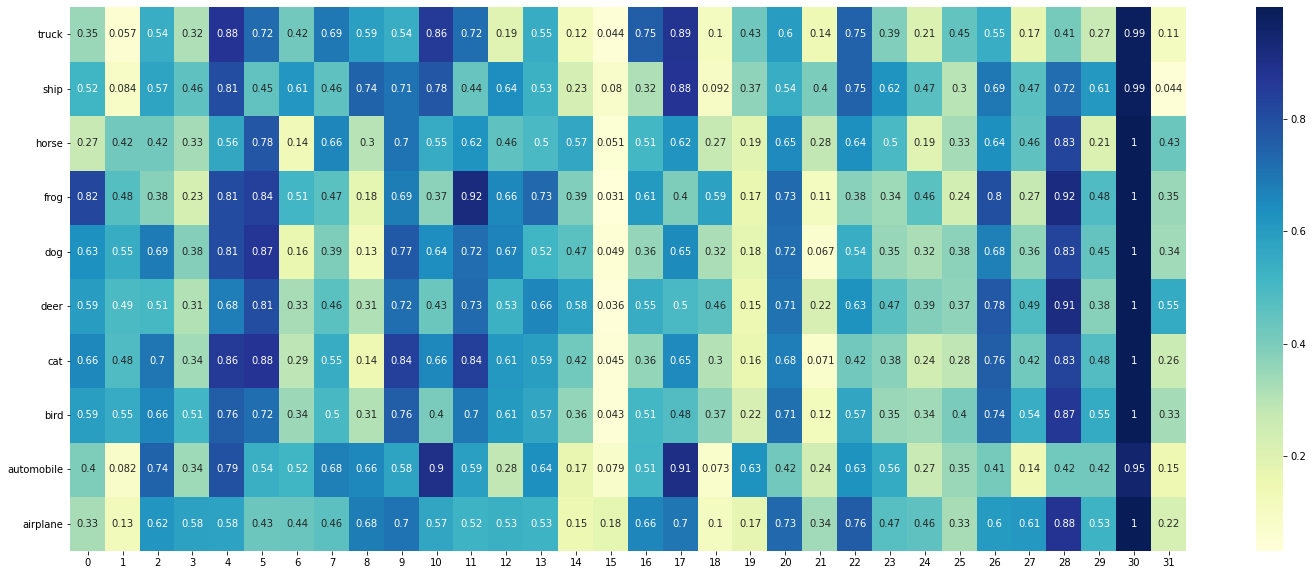

In [21]:
sum_bit = count_bit(df_deepbit, 32)

plt.figure(figsize=(25, 10))
ax = sns.heatmap(sum_bit,
                    cmap="YlGnBu",
                    annot=True,
                    xticklabels=range(sum_bit.shape[1]),
                    yticklabels=idx_label.values())
ax.set_ylim(0, 10)

(0.0, 10.0)

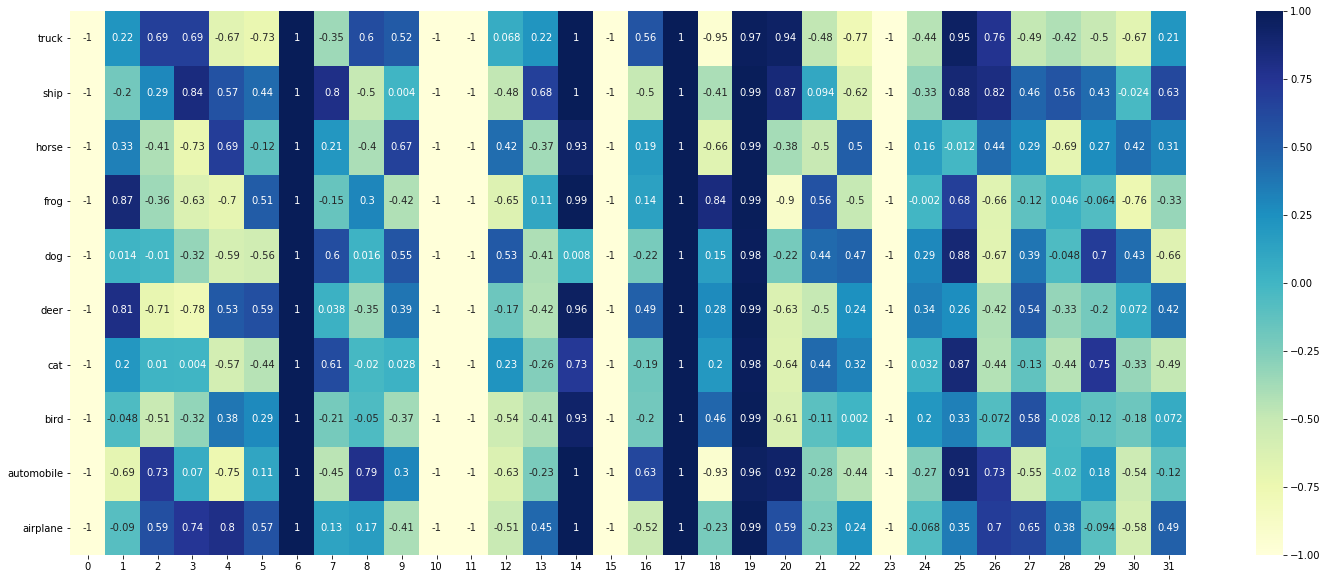

In [22]:
sum_bit = count_bit(df_greedy, 32)

plt.figure(figsize=(25, 10))
ax = sns.heatmap(sum_bit,
                    cmap="YlGnBu",
                    annot=True,
                    xticklabels=range(sum_bit.shape[1]),
                    yticklabels=idx_label.values())
ax.set_ylim(0, 10)

(0.0, 10.0)

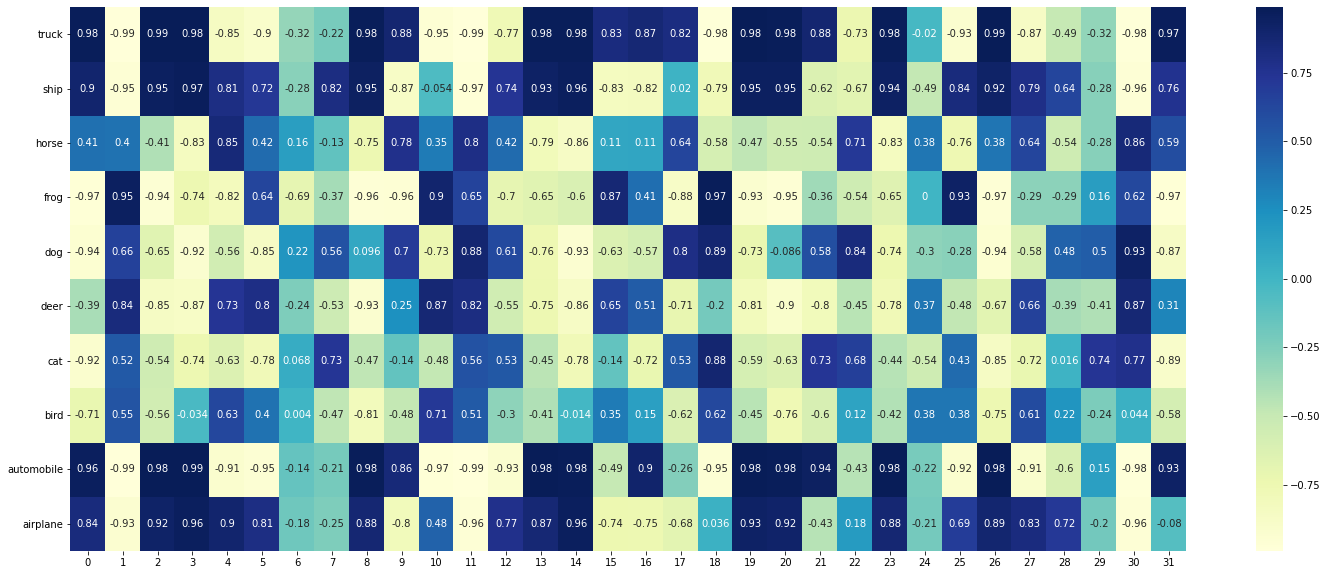

In [23]:
sum_bit = count_bit(df_bihalf, 32)

plt.figure(figsize=(25, 10))
ax = sns.heatmap(sum_bit,
                    cmap="YlGnBu",
                    annot=True,
                    xticklabels=range(sum_bit.shape[1]),
                    yticklabels=idx_label.values())
ax.set_ylim(0, 10)

### From scratch

In [57]:
feature = np.load('./save/feature/seed_222/test_feature.npy')
feature = np.sign(feature)
label = np.load('./save/feature/seed_222/test_labels.npy')

(0, 10)

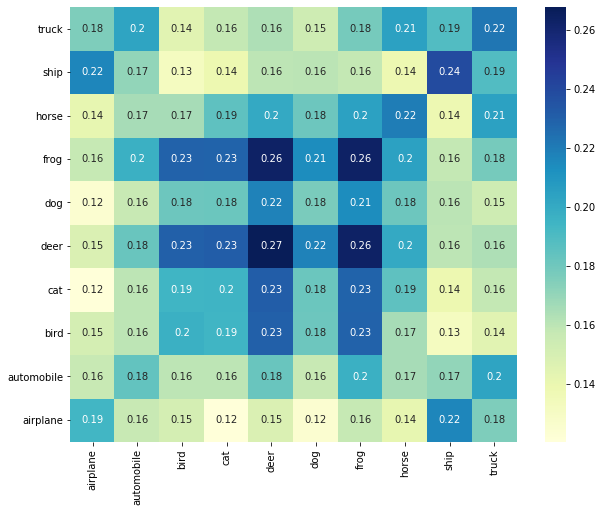

In [58]:
df_feature = pd.DataFrame()
df_feature['label'] = label
df_feature['bin_64'] = list(feature)

purity_matrices = np.array([kmeans_combine(df_feature, 10, 64) for i in range(10)])
purity_matrices = np.mean(purity_matrices, axis=0)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(purity_matrices,
                    cmap="YlGnBu",
                    annot=True,
                    vmin=np.min(purity_matrices), vmax=np.max(purity_matrices),
                    xticklabels=idx_label.values(),
                    yticklabels=idx_label.values())
ax.set_ylim(0, 10)

In [63]:
feature

array([[0.        , 0.9249327 , 0.        , ..., 0.        , 0.        ,
        0.39282483],
       [0.        , 0.91834813, 0.        , ..., 0.        , 0.        ,
        0.38810942],
       [0.        , 0.9222592 , 0.        , ..., 0.        , 0.        ,
        0.39739826],
       ...,
       [0.        , 0.92465466, 0.        , ..., 0.        , 0.        ,
        0.38627604],
       [0.        , 0.9276301 , 0.        , ..., 0.        , 0.        ,
        0.39093912],
       [0.        , 0.922349  , 0.        , ..., 0.        , 0.        ,
        0.39075226]], dtype=float32)

In [60]:
feature[1]

array([0.        , 0.91834813, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.7993825 , 0.        , 0.        ,
       0.3619715 , 0.        , 0.83310616, 0.        , 0.        ,
       2.219608  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.5431885 , 0.9349077 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.6126056 , 2.3827229 ,
       0.        , 1.2058051 , 0.        , 0.        , 0.        ,
       1.1328235 , 1.1903901 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.34930682, 0.06985978,
       0.12133416, 1.2498049 , 0.51029956, 0.        , 0.5044316 ,
       0.6574913 , 0.        , 0.        , 1.231161  , 0.        ,
       1.1374605 , 0.40336886, 0.90485966, 0.        , 1.7198982 ,
       0.26914555, 0.        , 0.        , 0.38810942], dtype=float32)